In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
df = pd.read_csv("./filtered_delhivery_data.csv")
df.head()

,trip_creation_time,route_type,source_center,destination_center,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,2018-09-20 02:35:36.476840,Carting,IND388121AAA,IND388620AAB,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653
1,2018-09-20 02:35:36.476840,Carting,IND388121AAA,IND388620AAB,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590
2,2018-09-20 02:35:36.476840,Carting,IND388121AAA,IND388620AAB,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152
3,2018-09-20 02:35:36.476840,Carting,IND388121AAA,IND388620AAB,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224
4,2018-09-20 02:35:36.476840,Carting,IND388121AAA,IND388620AAB,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 11 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   trip_creation_time              144867 non-null  object 
 1   route_type                      144867 non-null  object 
 2   source_center                   144867 non-null  object 
 3   destination_center              144867 non-null  object 
 4   actual_distance_to_destination  144867 non-null  float64
 5   actual_time                     144867 non-null  float64
 6   osrm_time                       144867 non-null  float64
 7   osrm_distance                   144867 non-null  float64
 8   segment_actual_time             144867 non-null  float64
 9   segment_osrm_time               144867 non-null  float64
 10  segment_osrm_distance           144867 non-null  float64
dtypes: float64(7), object(4)
memory usage: 12.2+ MB


In [106]:
# convert to datetime
df['trip_creation_time'] = pd.to_datetime(df['trip_creation_time'])
df['route_type'].value_counts()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 11 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   trip_creation_time              144867 non-null  datetime64[ns]
 1   route_type                      144867 non-null  object        
 2   source_center                   144867 non-null  object        
 3   destination_center              144867 non-null  object        
 4   actual_distance_to_destination  144867 non-null  float64       
 5   actual_time                     144867 non-null  float64       
 6   osrm_time                       144867 non-null  float64       
 7   osrm_distance                   144867 non-null  float64       
 8   segment_actual_time             144867 non-null  float64       
 9   segment_osrm_time               144867 non-null  float64       
 10  segment_osrm_distance           144867 non-null  float64

In [107]:
"""
• data - tells whether the data is testing or training data
• trip_creation_time – Timestamp of trip creation
• route_schedule_uuid – Unique Id for a particular route schedule
• route_type – Transportation type
• FTL – Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way
• Carting: Handling system consisting of small vehicles (carts)
• trip_uuid - Unique ID given to a particular trip (A trip may include different source and destination centers)
• source_center - Source ID of trip origin
• source_name - Source Name of trip origin
• destination_cente – Destination ID
• destination_name – Destination Name
• od_start_time – Trip start time
• od_end_time – Trip end time
• start_scan_to_end_scan – Time taken to deliver from source to destination
• is_cutoff – Unknown field
• cutoff_factor – Unknown field
• cutoff_timestamp – Unknown field
• actual_distance_to_destination – Distance in Kms between source and destination warehouse
• actual_time – Actual time taken to complete the delivery (Cumulative)
• osrm_time – An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)
• osrm_distance – An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)
• factor – Unknown field
• segment_actual_time – This is a segment time. Time taken by the subset of the package delivery
• segment_osrm_time – This is the OSRM segment time. Time taken by the subset of the package delivery
• segment_osrm_distance – This is the OSRM distance. Distance covered by subset of the package delivery
• segment_factor – Unknown field
"""
# the model construction is based on the dataset after cleaning
# As a result, it contias limited information
df.columns

Index(['trip_creation_time', 'route_type', 'source_center',
       'destination_center', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance'],
      dtype='object')

In [108]:
# However, the diverge of data points among actual, osrm, and segment give the oppotuntity to decide the suitable pair

import itertools

actual_slice = df[['actual_distance_to_destination', 'actual_time']]
osrm_slice = df[['osrm_distance', 'osrm_time']]
segment_slice = df[['segment_osrm_distance', 'segment_osrm_time', 'segment_actual_time']]

print(f"The comparsion between orsm time and actual time within segment:\n{(segment_slice['segment_osrm_time'] == segment_slice['segment_actual_time']).value_counts()}\n")
print(f"The comparsion of distance between actual and osrm:\n{(actual_slice['actual_distance_to_destination'] == osrm_slice['osrm_distance']).value_counts()}\n")
print(f"The comparsion of time between actual and osrm:\n{(actual_slice['actual_time'] == osrm_slice['osrm_time']).value_counts()}\n")
# diverge can be observed from the value_counts
# therefore, the new columns present delta can be created

The comparsion between orsm time and actual time within segment:
False    140779
True       4088
Name: count, dtype: int64

The comparsion of distance between actual and osrm:
False    144867
Name: count, dtype: int64

The comparsion of time between actual and osrm:
False    144315
True        552
Name: count, dtype: int64



In [109]:
# using the loop of to create deltas within distance and time in different categories
distance_columns = ['actual_distance_to_destination', 'osrm_distance', 'segment_osrm_distance']
time_columns =['actual_time', 'osrm_time', 'segment_osrm_time', 'segment_actual_time']

# new dataframe being created to focus deviation
df_delta = df.copy()

# create columns record the delta within distance
for col1, col2 in itertools.combinations(distance_columns, 2):
    df_delta[f'{col1}_minus_{col2}'] = df_delta[col1] - df_delta[col2]

# create columns record the delta within time
for col1, col2 in itertools.combinations(time_columns, 2):
    df_delta[f'{col1}_minus_{col2}'] = df_delta[col1] - df_delta[col2]

df_delta.columns
df_delta.iloc[:, -9:].describe()
# as we can see the the deviaion is huge within these datapoints
# this phenomenon may result from the technical failures, and outliers should be removed

,actual_distance_to_destination_minus_osrm_distance,actual_distance_to_destination_minus_segment_osrm_distance,osrm_distance_minus_segment_osrm_distance,actual_time_minus_osrm_time,actual_time_minus_segment_osrm_time,actual_time_minus_segment_actual_time,osrm_time_minus_segment_osrm_time,osrm_time_minus_segment_actual_time,segment_osrm_time_minus_segment_actual_time
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000
mean,-50.697925,211.244352,261.942277,203.059254,398.419978,380.731416,195.360724,177.672161,-17.688563
std,81.388901,341.286673,417.199154,303.743664,595.747939,593.822579,305.740818,309.990667,49.010556
min,-469.458566,-469.358156,-136.985500,-110.000000,-107.000000,0.000000,-97.000000,-2418.000000,-2418.000000
25%,-54.992652,8.892952,13.789200,21.000000,38.000000,27.000000,14.000000,2.000000,-19.000000
50%,-14.802877,42.588930,55.768700,65.000000,114.000000,95.000000,47.000000,36.000000,-10.000000
75%,-4.790011,260.129576,314.624650,247.000000,491.000000,464.500000,236.000000,221.000000,-5.000000
max,0.230174,1920.757605,2319.509000,3137.000000,4532.000000,4532.000000,1682.000000,1658.000000,274.000000


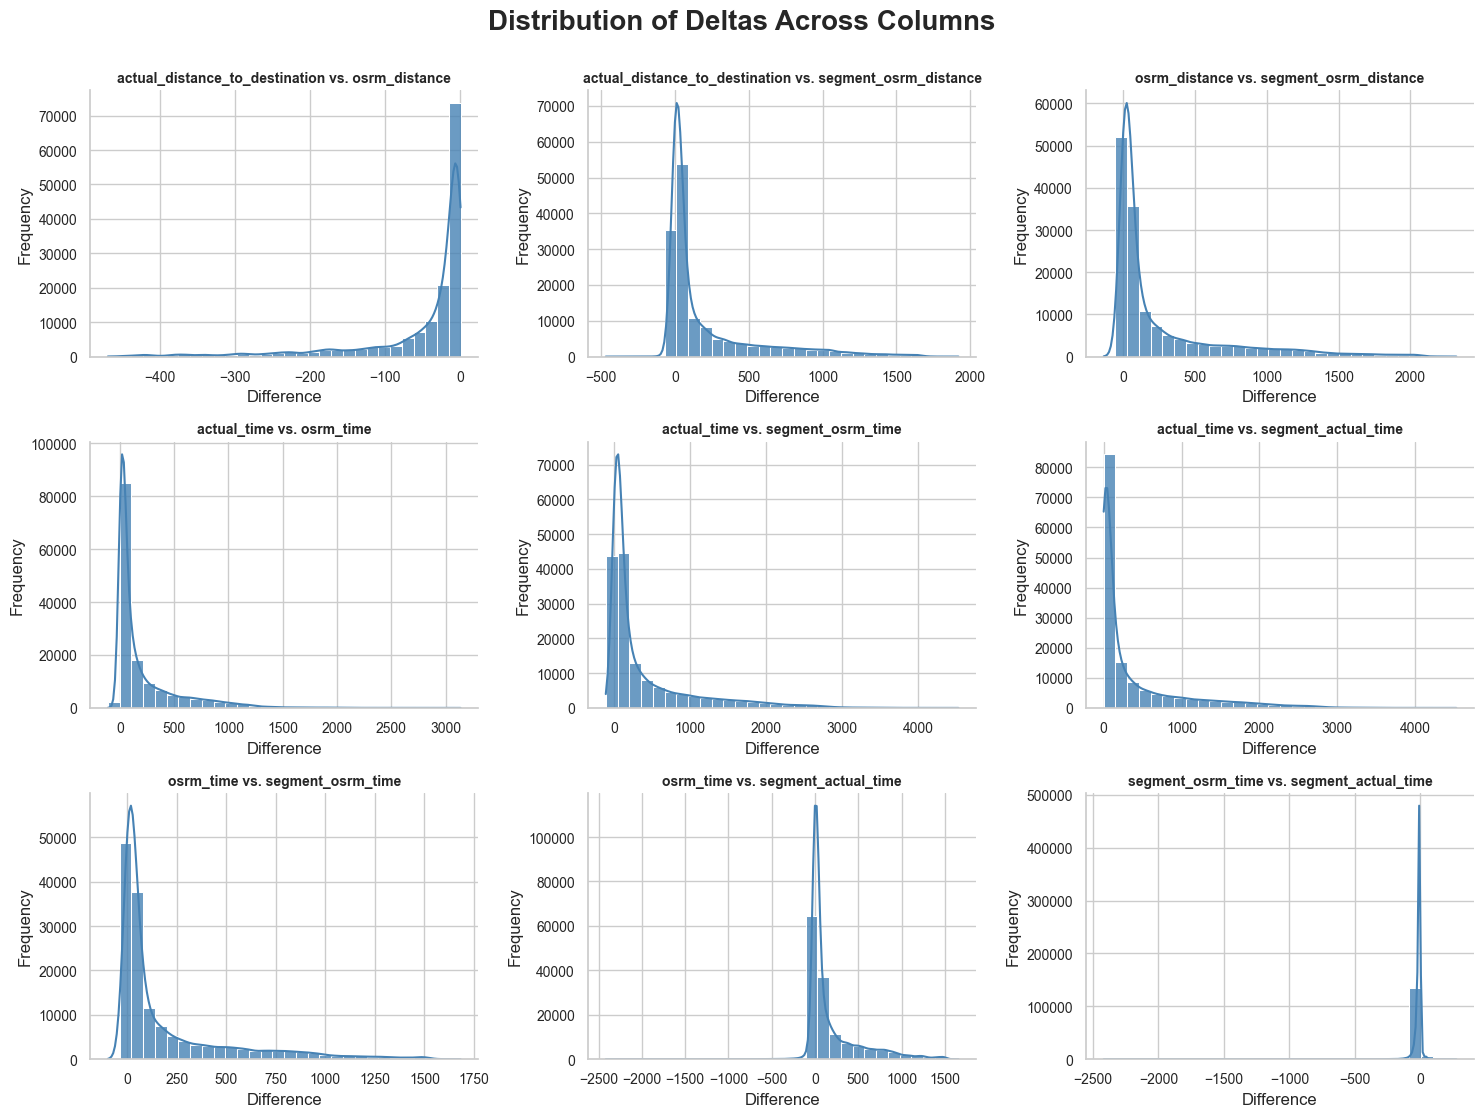

In [110]:
# these nine columns are the ones record deviations
delta_columns = df_delta.columns.tolist()[-9:]

# To plot the distribution of deviations, histplot is applied first

sns.set_theme(style="whitegrid", palette="muted")
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

# subplot introduced for better clarification
fig.suptitle('Distribution of Deltas Across Columns', fontsize=20, fontweight='bold', y=0.93)

for col, ax in zip(delta_columns, axes.flat):
    sns.histplot(
        df_delta[col], 
        kde=True, 
        bins=30, 
        color='steelblue', 
        edgecolor='white', 
        alpha=0.8, 
        ax=ax
    )
    ax.set_title(f'{col.replace("_minus_", " vs. ")}', fontsize=10, fontweight='bold')
    ax.set_xlabel('Difference', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.tick_params(axis='both', labelsize=10)
    sns.despine(ax=ax, top=True, right=True)

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

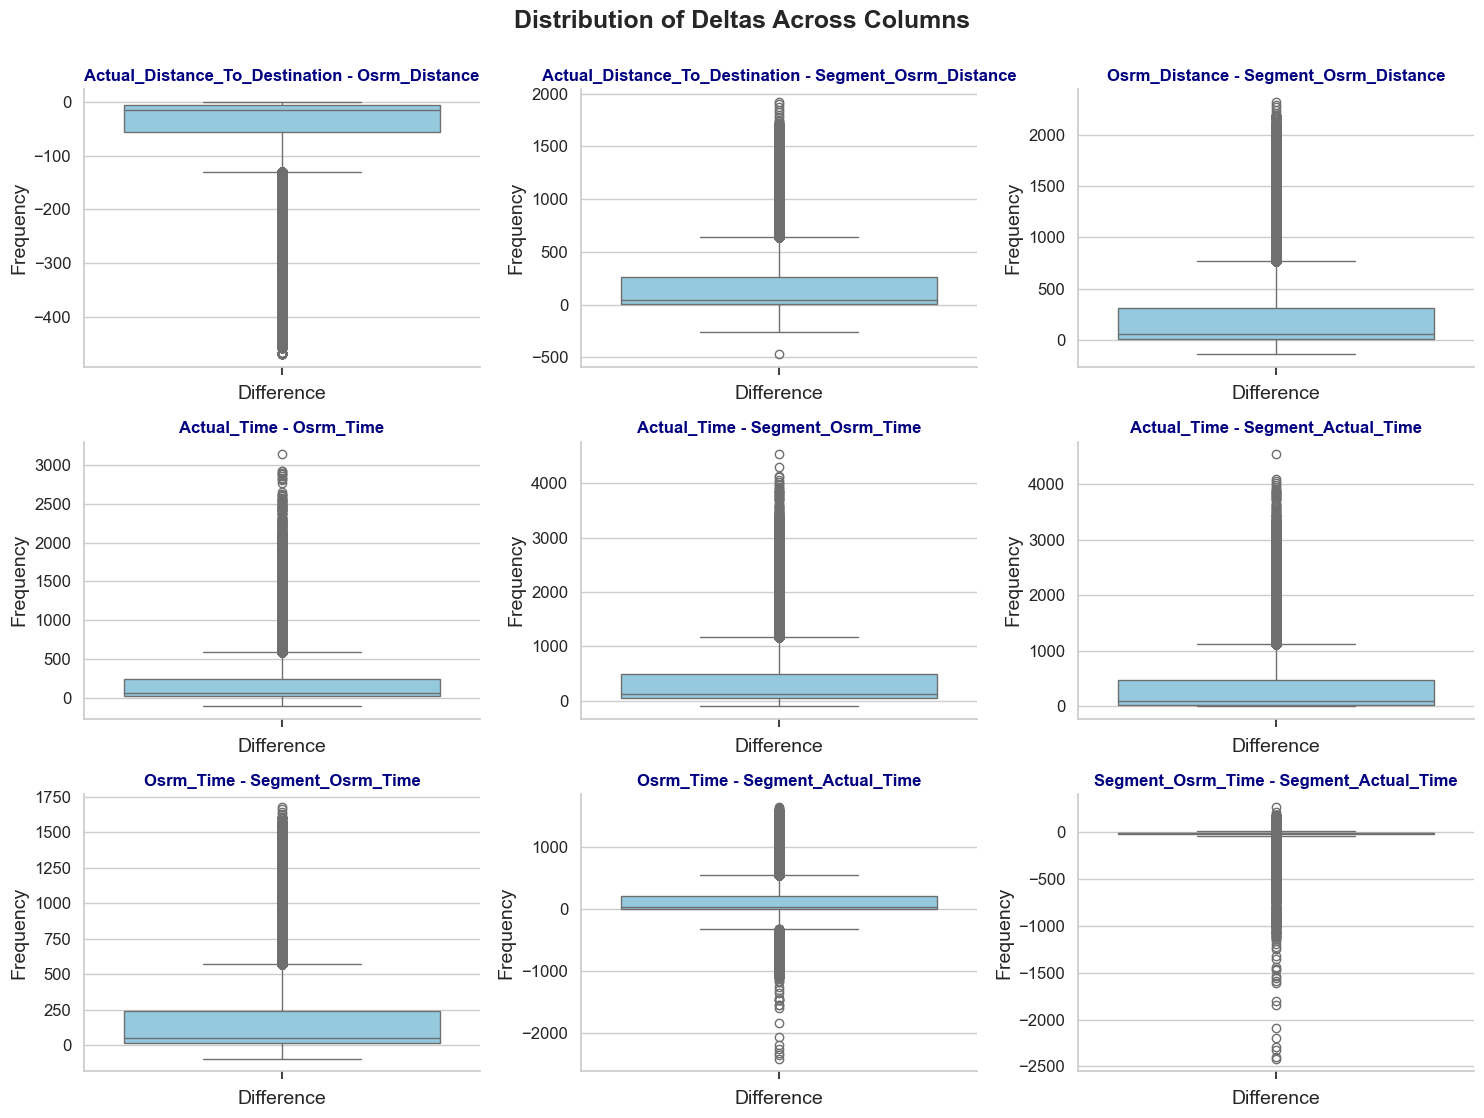

In [111]:

# the percentile is introduced, while the boxplots are created to visualize

df_percentile = df_delta[delta_columns]

# using the function to better reuse
def plot_nine_columns_boxplot(raw_data, delta_columns):
    sns.set_theme(style="whitegrid", palette="pastel")
    fig, axes = plt.subplots(3, 3, figsize=(15, 12))
    
    fig.suptitle('Distribution of Deltas Across Columns', fontsize=18, fontweight='bold', y=0.93)
    
    for col, ax in zip(delta_columns, axes.flat):

        sns.boxplot(
            y=raw_data[col],
            color='skyblue',

            ax=ax,
            orient='y'
        )
        
        ax.set_title(f'{col.replace("_minus_", " - ").title()}', fontsize=12, fontweight='bold', color='navy')
        ax.set_xlabel('Difference', fontsize=14)
        ax.set_ylabel('Frequency', fontsize=14)
        ax.tick_params(axis='both', labelsize=12)
        
        ax.xaxis.set_ticks_position('bottom')
        sns.despine(ax=ax, top=True, right=True)

    plt.tight_layout(rect=[0, 0, 1, 0.93])
    plt.show()

plot_nine_columns_boxplot(df_percentile, delta_columns)

In [112]:
# Normally thinking the outlier can be removed through Quantile Method
#  the boxplot demonstrates better performance than normalization
for i in delta_columns:
    Q1 = df_delta[i].quantile(0.25)
    Q3 = df_delta[i].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df_delta[i] < (Q1 - 1.5 * IQR)) | (df_delta[i] > (Q3 + 1.5 * IQR)))
    df_delta[f'{i}_outlier'] = outliers
df_delta.columns
df_delta['segment_osrm_time_minus_segment_actual_time_outlier'].value_counts()
last_9_columns = df_delta.iloc[:, -9:]
df_without_outliers = df_delta[~last_9_columns.all(axis=1)]

In [113]:
# It's abvious that some rows has been removed because of significant recording failure
df_without_outliers.shape[0] - df.shape[0]

-1346

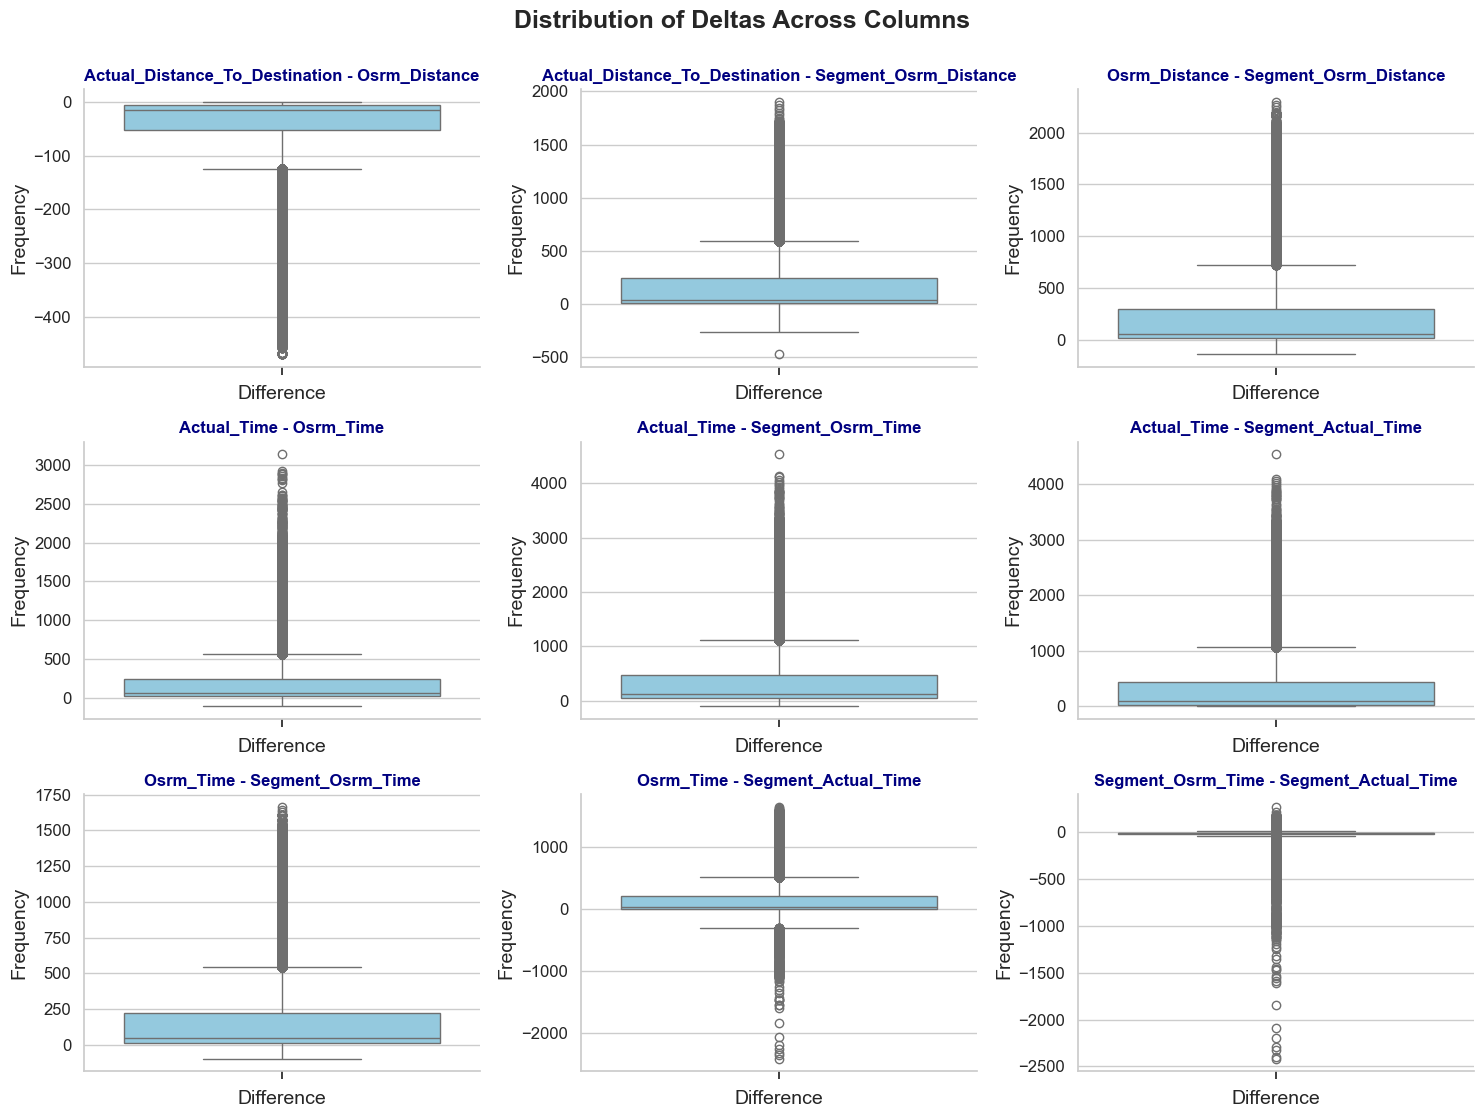

In [114]:
# reuse the boxplot to visualize the effects of outlier-removing method
plot_nine_columns_boxplot(df_without_outliers, delta_columns)

In [115]:
# To evulate the effect of outlier removing, the primary linear regression is ulilized
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

distance_time_pairs = list(itertools.product(distance_columns, time_columns))

class primary_linear_regression():
    def __init__(self, df_):
        self.df_ = df_

    def linear_regression_evaluation(self, X_raw, y_raw):
        X_train, X_test, y_train, y_test = train_test_split(X_raw, y_raw, test_size=0.2, random_state=42)
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # normal metrics
        mse = mean_squared_error(y_test, y_pred)
        rmse = mse ** 0.5
        mae = mean_absolute_error(y_test, y_pred)

        #R-Square calculation
        r2 = r2_score(y_test, y_pred)
        adjusted_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_train.shape[1] - 1)
        # take the number out of array
        coefficients = model.coef_[0]
        intercept = model.intercept_

        # SMAPE calculation
        smape = np.mean(2 * np.abs(y_test - y_pred) / (np.abs(y_test) + np.abs(y_pred) + 1e-10)) * 100
        
        results = {
            "coefficients": coefficients,
            "intercept": intercept,
            "mse": mse,
            "rmse": rmse,
            "mae": mae,
            "r2": r2,
            "adjusted_r2": adjusted_r2,
            "smape": smape
        }
        return results
    
    # The original data processing function without scaler
    """
    def get_dataset_from_pair(self, dis_time_index):
        # pair the distance and time
        X = df_without_outliers[distance_time_pairs[dis_time_index][0]].to_numpy().reshape(-1, 1)
        y = df_without_outliers[distance_time_pairs[dis_time_index][1]].to_numpy()
        #print(X, y)
        return X, y
    """

    def get_dataset_from_pair_and_standardize(self, dis_time_index):
        # pair the distance and time
        nummer_col = time_columns + distance_columns
        scaler_minmax = MinMaxScaler()
        df_scaled = self.df_[nummer_col]
        
        df_scaled = pd.DataFrame(scaler_minmax.fit_transform(df_scaled), columns=nummer_col)
        #print(df_without_outliers)
        #df_scaled.head()
        X = df_scaled[distance_time_pairs[dis_time_index][0]].to_numpy().reshape(-1, 1)
        
        y = df_scaled[distance_time_pairs[dis_time_index][1]].to_numpy()
        #print(X, y)
        
        return X, y

    #get_dataset_from_pair(0)[0].shape

    def evaluate_linear_regressor(self):
        comparsion_dict = {}
        for pair_index in range(len(distance_time_pairs)):
            result_dict = {}
            X_raw, y_raw = self.get_dataset_from_pair_and_standardize(pair_index)
            #print(distance_time_pairs[pair_index])
            
            result_dict = self.linear_regression_evaluation(X_raw, y_raw)
            result_dict['Index'] = pair_index
            #print(result_dict)
            #break
            comparsion_dict[pair_index] = result_dict	
        #print(comparsion_dict)
        comparsion_df = pd.DataFrame.from_dict(comparsion_dict, orient='index').set_index('Index')
        return comparsion_df

In [116]:
# to clearer visualization, the distance-time pair will only shown as the index in tables
# and the index meaning can be seen on the information below

Distance_time_pair_df= pd.DataFrame(distance_time_pairs, columns=['Distance', 'Time'])
Distance_time_pair_df.index.name = 'Index'

Distance_time_pair_df

,Distance,Time
Index,,
0,actual_distance_to_destination,actual_time
1,actual_distance_to_destination,osrm_time
2,actual_distance_to_destination,segment_osrm_time
3,actual_distance_to_destination,segment_actual_time
4,osrm_distance,actual_time
5,osrm_distance,osrm_time
6,osrm_distance,segment_osrm_time
7,osrm_distance,segment_actual_time
8,segment_osrm_distance,actual_time


In [117]:
First_attempt = primary_linear_regression(df_without_outliers)
First_attempt.evaluate_linear_regressor()

,coefficients,intercept,mse,rmse,mae,r2,adjusted_r2,smape
Index,,,,,,,,
0,0.714910,0.005949,0.000747,0.027335,0.013411,0.954436,0.954434,33.740028
1,1.015008,0.004677,0.000282,0.016796,0.009898,0.991049,0.991049,21.217632
2,0.007499,0.010564,0.000076,0.008729,0.004857,0.022091,0.022056,44.391385
3,0.002015,0.084657,0.000260,0.016125,0.005760,0.000371,0.000336,6.132945
4,0.707784,0.005548,0.000716,0.026763,0.012830,0.956322,0.956321,32.965712
5,1.007526,0.003805,0.000059,0.007667,0.005194,0.998135,0.998135,16.390386
6,0.007970,0.010497,0.000076,0.008713,0.004851,0.025591,0.025558,44.335244
7,0.002288,0.084622,0.000260,0.016124,0.005759,0.000530,0.000496,6.131237
8,3.626116,0.049292,0.015466,0.124363,0.087258,0.056875,0.056842,110.644228


In [118]:
First_attempt_withoutExcludingOutliers = primary_linear_regression(df_delta)
First_attempt_withoutExcludingOutliers.evaluate_linear_regressor()

,coefficients,intercept,mse,rmse,mae,r2,adjusted_r2,smape
Index,,,,,,,,
0,0.718908,0.005780,0.000769,0.027726,0.013795,0.956072,0.956071,33.524041
1,1.015149,0.004610,0.000274,0.016566,0.009850,0.991770,0.991770,20.960563
2,0.008088,0.010550,0.000064,0.007991,0.004876,0.032223,0.032190,44.684773
3,0.003919,0.084567,0.000262,0.016199,0.005962,0.002685,0.002650,6.347660
4,0.711905,0.005418,0.000723,0.026887,0.013134,0.958689,0.958688,32.757801
5,1.007927,0.003780,0.000058,0.007614,0.005170,0.998261,0.998261,16.101583
6,0.008515,0.010486,0.000064,0.007972,0.004869,0.036885,0.036852,44.619910
7,0.004173,0.084530,0.000262,0.016196,0.005959,0.003126,0.003092,6.343607
8,3.687403,0.051728,0.016248,0.127467,0.090204,0.071540,0.071508,110.841167


In [119]:
# this analysis will focus on the metrics including R-Square and SMAPE based on the reference
# Obviously, this kind of outlier-removing methods can improve the performance according to metrics introduced
# But this kind of methods has fatal demerits, it removed the delta close to 0, which is totally unacceptable
# As a result, more refined processing methods shall be introduced